#### Consigna

In [15]:
# Input: initial_state = AgentState(number1 = 10, operation="-",
# number2 = 5, number3 = 7, number4=2, operation2="+",
# finalNumber= 0, finalNumber2 = 0)

In [16]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [17]:
class AgentState(TypedDict):
    number1: int 
    number2: int
    number3: int
    number4: int
    operation1: str
    operation2: str
    finalumber1: int
    finalnumber2: int

In [18]:


def add_operation1(state: AgentState) -> AgentState:
    """Esta funcion suma los 2 primeros numeros ingresados"""
    state['finalnumber1'] = state['number1'] + state['number2']
    return state

def substrac_operation1 (state: AgentState) -> AgentState:
    state["finalnumber1"] = state["number1"] - state["number2"]
    return state

def add_operation2 (state: AgentState) -> AgentState:
    """Esta funcion suma los 2 numeros ingresados por segunda vez"""
    state["finalnumber2"] = state["number3"] + state["number4"]
    return state

def substract_operation2 (state: AgentState) -> AgentState:
    """Esta resta los 2 numeros ingresados por segunda vez"""
    state["finalnumber2"] = state["number3"] - state["number4"]
    return state

def desition1 (state: AgentState) -> AgentState:
    """Esta operacion decide entre suma o resta segun el operation1 ingresado"""
    if state["operation1"] == "+":
        return "edge_desition_add1"
    elif state["operation1"] == "-":
        return "edge_desition_substract1"

def desition2 (state: AgentState) -> AgentState:
    """Esta operacion decide entre suma o resta segun el operation2 ingresado"""
    if state["operation2"] == "+":
        return "edge_desition_add2"
    elif state["operation2"] == "-":
        return "edge_desition_substract2"

        



In [19]:
graph = StateGraph(AgentState)

#nodes
graph.add_node("add_node1", add_operation1)
graph.add_node("substract_node1", substrac_operation1)
graph.add_node("router1", lambda state: state)
graph.add_node("router2", lambda state: state)
graph.add_node("add_node2", add_operation2)
graph.add_node("substract_node2", substract_operation2)

#edges
graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    desition1,
    {   "edge_desition_add1" : "add_node1", 
        "edge_desition_substract1" : "substract_node1" # es como que lo indexa con el nodo que va a hacer esa operacion:  add_node1 y no con la operacion en si add_operation1
    }
)

graph.add_edge("add_node1", "router2")
graph.add_edge("substract_node1", "router2")

graph.add_conditional_edges(
    "router2",
    desition2,
    {
        "edge_desition_add2" : "add_node2",
        "edge_desition_substract2" : "substract_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("substract_node2", END)

app = graph.compile()


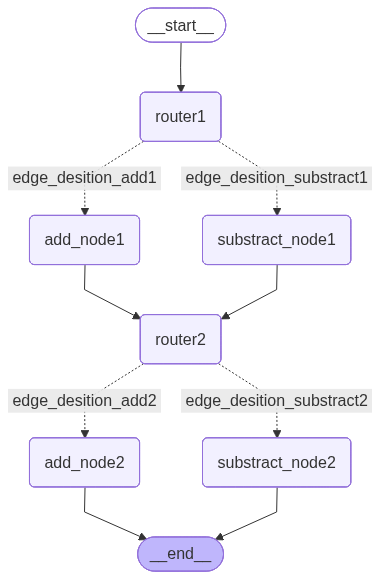

In [20]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
# Input: initial_state = AgentState(number1 = 10, operation="-",
# number2 = 5, number3 = 7, number4=2, operation2="+",
# finalNumber= 0, finalNumber2 = 0)


resultado1 = AgentState(number1 = 10 , number2= 5, number3= 7, number4= 2, operation1="-" , operation2="+", finalumber1=0, finalnumber2=0)
app.invoke(resultado1)

{'number1': 10,
 'number2': 5,
 'number3': 7,
 'number4': 2,
 'operation1': '-',
 'operation2': '+',
 'finalumber1': 0,
 'finalnumber2': 9}

In [22]:

app.invoke(AgentState(number1 = 20 , number2= 10, number3= 5, number4= 20, operation1="-" , operation2="+", finalumber1=0, finalnumber2=0))

{'number1': 20,
 'number2': 10,
 'number3': 5,
 'number4': 20,
 'operation1': '-',
 'operation2': '+',
 'finalumber1': 0,
 'finalnumber2': 25}

In [24]:
app.invoke({"number1" : 20 , "number2": 10, "number3":5, "number4": 20, "operation1": "-" , "operation2": "+", "finalumber1": 0, "finalnumber2": 0})

{'number1': 20,
 'number2': 10,
 'number3': 5,
 'number4': 20,
 'operation1': '-',
 'operation2': '+',
 'finalumber1': 0,
 'finalnumber2': 25}